


---


> O modelo tem como objetivo classifica **(sim/não)**, se determinado cliente irá realizar futuras compras.

Link da base de dados para download: https://www.kaggle.com/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr?resource=download


---






In [2]:
!pip install category_encoders

Importação das bibliotecas necessárias

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as nsn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import category_encoders as ce




Importação da base de dados

In [4]:
caminho=pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv',sep=',')
df_ecommmer=pd.DataFrame(caminho)

df_ecommmer

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


# Análise exploratória

In [5]:
df_ecommmer.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [6]:
df_ecommmer.tail() #visualizando as 5 últimas linhas.

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4
4999,ORD_000902,CUST_00902,2024-03-26,30,Female,Konya,Books,84.30,4,21.72,315.48,Debit Card,Desktop,8,9,True,5,5


In [7]:
# Verificando maior compra
df_ecommmer['Total_Amount'].max()  # ---> 22023.9

df_ecommmer[df_ecommmer['Total_Amount']==22023.9]  # Cliente do sexo feminino, realiza compra de 5 unidades de produtos da categoria Eletrônicos , não é cliente recorrente fez boa avaliação (5)

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
4592,ORD_004705,CUST_04705,2024-02-18,41,Female,Istanbul,Electronics,4404.78,5,0.0,22023.9,Credit Card,Mobile,23,7,False,2,5


In [8]:
df_ecommmer.isnull().sum() #--> sem valores nulos

,0
Order_ID,0
Customer_ID,0
Date,0
Age,0
Gender,0
City,0
Product_Category,0
Unit_Price,0
Quantity,0
Discount_Amount,0


In [9]:
df_ecommmer.duplicated().sum() # --> sem valores duplicados.

np.int64(0)

In [10]:
df_ecommmer.describe() #visualizando medidas estatística dos dados.

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


In [11]:
df_ecommmer.info()  # visualizndo tipos dos dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [12]:
# Modificação do formato da coluna Date

df_ecommmer['Date'] = pd.to_datetime(df_ecommmer['Date'])

# Criação de colunas de ano e mês:

# coluna ano
df_ecommmer['Year']= df_ecommmer['Date'].dt.year

# coluna mês
df_ecommmer['Month']=df_ecommmer['Date'].dt.month


#  Criação de coluna ano-mês
df_ecommmer['Year_Month']= df_ecommmer['Date'].dt.to_period('M')

In [13]:
df_ecommmer.info() #Visualizando alterações do tipo dos dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  5000 non-null   object        
 1   Customer_ID               5000 non-null   object        
 2   Date                      5000 non-null   datetime64[ns]
 3   Age                       5000 non-null   int64         
 4   Gender                    5000 non-null   object        
 5   City                      5000 non-null   object        
 6   Product_Category          5000 non-null   object        
 7   Unit_Price                5000 non-null   float64       
 8   Quantity                  5000 non-null   int64         
 9   Discount_Amount           5000 non-null   float64       
 10  Total_Amount              5000 non-null   float64       
 11  Payment_Method            5000 non-null   object        
 12  Device_Type         

In [14]:
# Verificando quantidade de clientes recorrentes (false/true)
contagem=df_ecommmer['Is_Returning_Customer'].value_counts()
contagem
# A base apresenta mais clientes recorrentes

,count
Is_Returning_Customer,
True,2990
False,2010


In [15]:
# Loop para verificar divisão de classificação
for n in range(1,6):
 filtro=(df_ecommmer['Customer_Rating']==n).sum()
 print(f'Classificação {n}: {filtro}')



Classificação 1: 234
Classificação 2: 429
Classificação 3: 759
Classificação 4: 1745
Classificação 5: 1833


# Análise e vizualização dos dados com gráficos

O gráfico abaixo tem como intuito exibir o faturamento anual/mensal

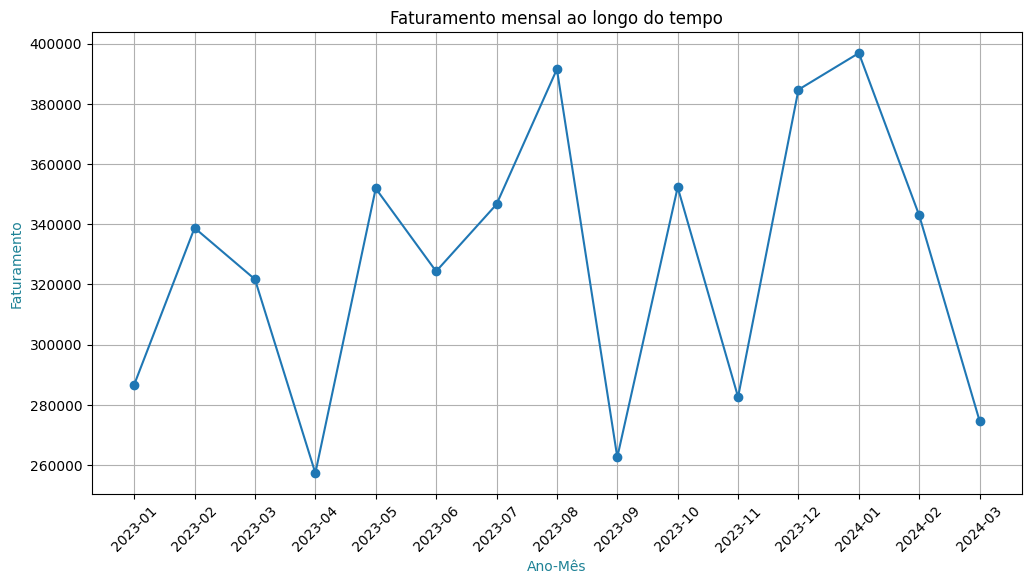

In [16]:
import matplotlib.pyplot as plt
faturamento_mensal = (
    df_ecommmer
    .groupby('Year_Month')['Total_Amount']
    .sum()
    .reset_index()
)

faturamento_mensal['Year_Month'] = faturamento_mensal['Year_Month'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(
    faturamento_mensal['Year_Month'],
    faturamento_mensal['Total_Amount'],
    marker='o'
)

plt.title('Faturamento mensal ao longo do tempo')
plt.xlabel('Ano-Mês',color='#1e8296')
plt.ylabel('Faturamento',color='#1e8296')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

É possivél nota picos de vendas no primeiro semetre do ano de **2023** existe dois pico: **fevereiro/02, maio/05**, em seguida é possivel nota pico maior em **Agosto/08**.

Já em **2024** o maior faturamento foi em **Janeiro/01** superando o mês de **agosto - 2023**.

O gráfico abaixo permite identificar a quantidade de avaliações na escala de
1 -5 feita pelos clientes, tendo em destaque uma boa sastifação.
É válido salienta que a classificação **1 e 2** devem ser investigada.

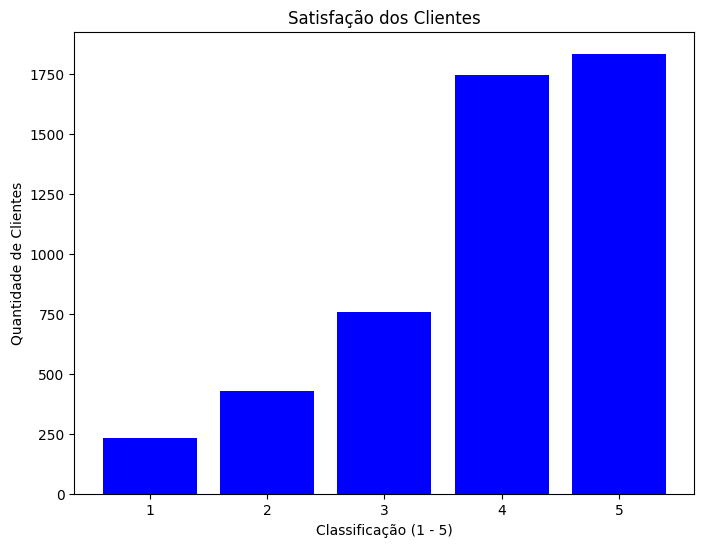

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
rating_counts = df_ecommmer['Customer_Rating'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values,color='Blue')
plt.title('Satisfação dos Clientes')
plt.xlabel('Classificação (1 - 5)')
plt.ylabel('Quantidade de Clientes')




plt.show()

  Verificando se os clientes que informaram classificação **1 e 2** são os mesmos que não são recorrentes.

In [18]:
df_filtro=df_ecommmer[df_ecommmer['Customer_Rating'].isin([1,2])]

In [19]:
df_filtro.groupby('Is_Returning_Customer')['Customer_Rating'].value_counts()

Is_Returning_Customer  Customer_Rating
False                  2                  178
                       1                   88
True                   2                  251
                       1                  146
Name: count, dtype: int64

Obervação: **O resultado** mostra que os clientes recorrentes **(True)** tiveram maioria --> sendo **251** para classificão 2 e **146** para classificação 1.  
Por mais menor que seja em comparação as classificações mais altas, ainda sim demonstra insastifação.

E para clientes **não recorrente**  178 para classificação 2 e **88** para classificação 1, um número bem baixo.

Analisando fatores que podem ter influência nas classificações de clientes recorrentes


In [20]:
# Verificando tempo de entregra por categoria, recorrência do cliente e classificação

df_ecommmer.groupby(['Customer_Rating','Is_Returning_Customer'])['Delivery_Time_Days'].describe()



# Conclusão: os dados demonstram que o tempo de entrega são semelhantes tendo pouca ou quause nenhuma oscilação

count      mean       std  min  25%  \
Customer_Rating Is_Returning_Customer                                         
1               False                    88.0  6.863636  3.291165  1.0  5.0   
                True                    146.0  6.500000  3.572404  1.0  4.0   
2               False                   178.0  6.511236  3.606709  1.0  4.0   
                True                    251.0  6.390438  3.570847  1.0  4.0   
3               False                   298.0  6.701342  3.496231  1.0  4.0   
                True                    461.0  6.355748  3.269642  1.0  4.0   
4               False                   707.0  6.527581  3.473537  1.0  4.0   
                True                   1038.0  6.615607  3.530229  1.0  4.0   
5               False                   739.0  6.491204  3.644183  1.0  4.0   
                True                   1094.0  6.364717  3.295937  1.0  4.0   

                                       50%   75%   max  
Customer_Rating Is_Returning_Customer                   
1               False                  6.5  9.00  18.0  
                True                   6.0  8.00  17.0  
2               False                  6.0  8.75  25.0  
                True                   6.0  8.00  20.0  
3               False                  6.0  9.00  20.0  
                True                   6.0  8.00  23.0  
4               False                  6.0  8.00  24.0  
                True                   6.0  9.00  23.0  
5               False                  6.0  9.00  25.0  
                True                   6.0  8.00  22.0

In [21]:
# Verificando quais categorias possuem mais concentração de classificação 1 e 2

pd.crosstab([df_ecommmer['Product_Category'], df_ecommmer['Is_Returning_Customer']], df_ecommmer['Customer_Rating'])

# A seguir o resultado permitir visualiza quantos clientes realizando classificação X para cada categoria.

Customer_Rating                          1   2   3    4    5
Product_Category Is_Returning_Customer                      
Beauty           False                  15  25  32   85  103
                 True                   15  32  51  136  127
Books            False                   5  27  30   93   96
                 True                   19  26  55  118  147
Electronics      False                   9  21  26   86   96
                 True                   20  31  67  130  138
Fashion          False                  17  22  38   86   89
                 True                   19  31  50  134  136
Food             False                  12  18  38   87   84
                 True                   21  37  65  134  123
Home & Garden    False                   9  21  40   86   95
                 True                   17  34  52  120  147
Sports           False                   9  20  43  108   92
                 True                   20  33  61  144  137
Toys             False                  12  24  51   76   84
                 True                   15  27  60  122  139

Com o resultado obtido é válido destacar que clientes **recorrentes(True)** tem maior número de classificação independente da categoria

In [22]:

# Tempo de entrega por categoria e classificação 1 e 2

# fitro para classificação 1 & 2
df_baixa_classificao=df_ecommmer[df_ecommmer['Customer_Rating'].isin([1,2])]


# Cálculo média de entrega
media_entrega=(
    df_baixa_classificao.groupby ('Product_Category')['Delivery_Time_Days']
    .mean()
    .sort_values(ascending=False)
)


media_entrega  #Média superior apenas para  a categoria **Books --> 7.12..**


,Delivery_Time_Days
Product_Category,
Books,7.129870
Home & Garden,6.629630
Toys,6.589744
Sports,6.585366
Beauty,6.540230
Food,6.318182
Fashion,6.292135
Electronics,6.061728


In [23]:
# Analisando tempo de entrega para classificação
print(df_baixa_classificao['Delivery_Time_Days'].describe())

df_baixa_classificao[df_baixa_classificao['Delivery_Time_Days']==25] # Um cliente possui entrega no dia máximo, tendo classificação 2
# Podendo ser influênciado pelo tempo de entrega ou expectativa do cliente.

count    663.000000
mean       6.509804
std        3.540377
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       25.000000
Name: Delivery_Time_Days, dtype: float64


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,...,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Year_Month
1665,ORD_004633,CUST_04633,2023-06-04,39,Female,Ankara,Books,50.15,1,0.0,...,Debit Card,Mobile,19,9,False,25,2,2023,6,2023-06


In [24]:
# Tempo de entrega para as demais classificação
df_alta_classificacao = df_ecommmer[df_ecommmer['Customer_Rating'].isin([3,4,5])]

df_alta_classificacao['Delivery_Time_Days'].describe()

,Delivery_Time_Days
count,4337.000000
mean,6.495043
std,3.453705
min,1.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,25.000000


In [25]:

# Verificando média em minutos por sessão para tipo de clientes
df_baixa_classificao.groupby('Is_Returning_Customer')['Session_Duration_Minutes'].mean()

# O tempo de sessão igualitario ou pouco superior indica que essa variavél não tem influência na avaliação
# O resultado exibido mostra que clientes recorrentes(True) possuem em média menos tempo por sessão.

,Session_Duration_Minutes
Is_Returning_Customer,
False,14.075188
True,13.579345


In [26]:
# Páginas visitas em média, pelos clientes

df_ecommmer['Pages_Viewed'].mean()



np.float64(8.9842)

In [27]:
# Verificando média de desconto por classificação

df_ecommmer.groupby('Customer_Rating')['Discount_Amount'].mean()

# Para classificação 2 houve menor desconto

,Discount_Amount
Customer_Rating,
1,25.409060
2,20.251282
3,26.866298
4,22.331530
5,27.425237


In [28]:
# Total de vendas por cidade para clientes com classificação 1 ou 2
df_baixa_classificao['City'].value_counts().sum()

np.int64(663)

In [29]:
# Calculando média: tempo de entrega
df_ecommmer['Delivery_Time_Days'].mean() # o tempo de entrega em média: 6

np.float64(6.497)

In [30]:
# Vizualizando pessoas com tempo de entrega acima da média, para clientes que realizaram clasificação (1,2)
filtro_tmp_entrega=df_baixa_classificao[df_baixa_classificao['Delivery_Time_Days']>=9]
filtro_tmp_entrega

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,...,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Year_Month
30,ORD_003991,CUST_03991,2023-01-04,18,Male,Antalya,Sports,288.26,4,0.00,...,Credit Card,Desktop,8,6,True,14,2,2023,1,2023-01
34,ORD_003730,CUST_03730,2023-01-05,18,Female,Antalya,Sports,544.60,1,0.00,...,Credit Card,Desktop,9,10,True,13,2,2023,1,2023-01
58,ORD_004740,CUST_04740,2023-01-07,43,Female,Istanbul,Home & Garden,1228.33,2,0.00,...,Bank Transfer,Desktop,6,8,True,11,1,2023,1,2023-01
148,ORD_003485,CUST_03485,2023-01-17,22,Female,Ankara,Home & Garden,234.69,1,0.00,...,Cash on Delivery,Mobile,15,7,False,11,1,2023,1,2023-01
196,ORD_002846,CUST_02846,2023-01-22,21,Male,Ankara,Home & Garden,269.00,1,24.28,...,Digital Wallet,Mobile,11,13,True,10,2,2023,1,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,ORD_000734,CUST_00734,2024-03-11,18,Male,Ankara,Home & Garden,794.14,5,0.00,...,Credit Card,Mobile,6,10,True,10,1,2024,3,2024-03
4874,ORD_000545,CUST_00545,2024-03-16,18,Female,Izmir,Home & Garden,574.49,4,0.00,...,Digital Wallet,Desktop,13,8,True,9,1,2024,3,2024-03
4896,ORD_000369,CUST_00369,2024-03-18,36,Male,Istanbul,Toys,140.33,4,0.00,...,Credit Card,Mobile,19,7,False,17,2,2024,3,2024-03
4984,ORD_004451,CUST_04451,2024-03-25,29,Male,Ankara,Food,82.89,5,0.00,...,Credit Card,Mobile,13,12,True,9,1,2024,3,2024-03


O gráfico abaixo é um **Boxplot** (ou diagrama de caixa),
excelente para visualiza a **distribuição**, a **mediana** e a **dispersão dos dados**. Ajudará na identificação de padrões na variável **tempo de entrega** por avaliações do clientes

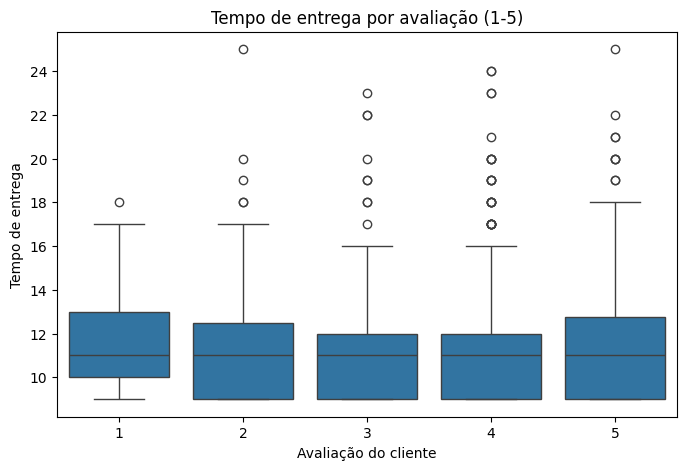

In [31]:
import seaborn as sns



filtro_tmp_entrega=df_ecommmer[df_ecommmer['Delivery_Time_Days']>=9]


plt.figure(figsize=(8,5))
sns.boxplot(
    data=filtro_tmp_entrega,
    x='Customer_Rating',
    y='Delivery_Time_Days'
)


plt.title('Tempo de entrega por avaliação (1-5)')
plt.xlabel('Avaliação do cliente')
plt.ylabel('Tempo de entrega')
plt.show()

# O gráfico exibir que clientes de classificação 1 & 2 possuem poucos outliers, tendo como
# influencia na nota fatores com expectativa do produto

# O que o gráfico que dizer?

**As Caixas Azuis**: Representam onde está a maioria das entregas de cada nota. **Quanto mais baixa a caixa está no gráfico, mais rápido o produto chegou.**

**A Linha no Meio:** É o "tempo comum" de espera. Notamos que ela desce conforme a nota sobe: **menos espera = cliente mais feliz.**

**As Bolinhas (Outliers):** São os casos excepcionais de grande atraso.

O "Pulo do Gato": Ter muitas bolinhas na Nota 5 mostra que alguns clientes possuem fidelidade e gostam da empresa dando nota máxima mesmo quando a entrega demora muito. O **atraso não estragou a experiência deles!**


Clientes que dão notas **1 e 2** geralmente foram afetados pelo **tempo de entrega padrão elevado.** Já nas notas mais altas, o grande número de outliers prova que fatores como expectativa e qualidade permitem que o cliente ignore um atraso isolado e mantenha a avaliação máxima."



categoria do produto e tempo de navegação não apresentam influência significativa nas avaliações baixas. No entanto, observou-se que pedidos com avaliações entre 1 - 3 tendem a apresentar um tempo de entrega acima da média geral, sugerindo que esse fator pode contribuir para a insatisfação do cliente, embora não seja determinante de forma isolada.

O gráfico a seguir exibir o total de vendas para cada categori, evidênciando as categorias com **maiores vendas**.

# O gráfico abaixo permite visualizar as vendas totais por cada cidade, tendo em destaque com maior vendas as cidades de colunas azul.

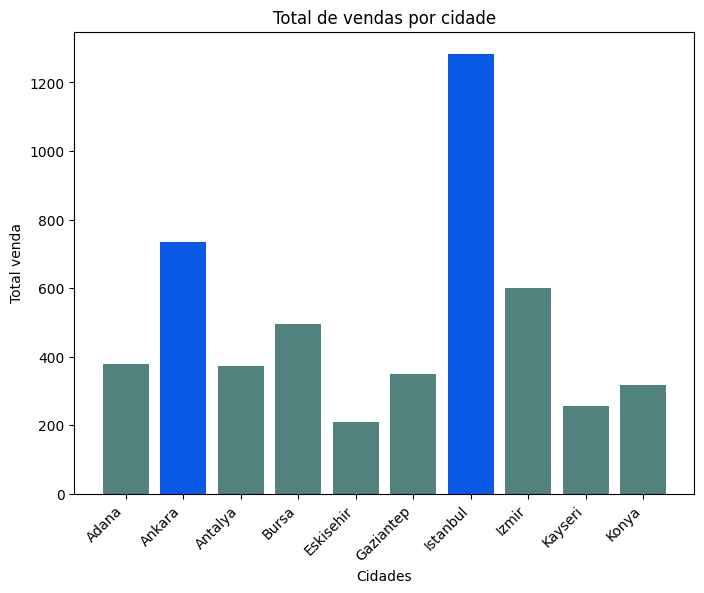

In [32]:
plt.figure(figsize=(8, 6))
rating_counts = df_ecommmer['City'].value_counts().sort_index()

def definir_cor(city):
  if city =='Istanbul':
    return '#0759e6'
  elif city== 'Ankara':
    return '#0759e6'
  else:
    return '#51827d'

cores=[]

for cidade_nome in rating_counts.index:
  cor_cidade=definir_cor(cidade_nome)
  cores.append(cor_cidade)


plt.bar(rating_counts.index, rating_counts.values, color=cores)
plt.title('Total de vendas por cidade')
plt.xlabel('Cidades')
plt.ylabel('Total venda')
plt.xticks(rotation=45, ha='right')


plt.show()

In [33]:
# Analisando quantidade de produtos de cada categoria nas cidades
df_ecommmer.groupby('City')['Product_Category'].value_counts().sort_values()
# Cidade Istanbull possui maior concentração da categoria --> Fashion

City       Product_Category
Eskisehir  Toys                 18
           Fashion              23
           Electronics          24
Kayseri    Fashion              25
Eskisehir  Beauty               27
                              ... 
Istanbul   Toys                157
           Sports              161
           Beauty              168
           Books               169
           Fashion             176
Name: count, Length: 80, dtype: int64

In [34]:
# Quantidade de pessoas por minutos de navergações na página
df_ecommmer['Session_Duration_Minutes'].value_counts()

# Observação: Quanto mais minutos menos tempo as pessoas ficam no site

,count
Session_Duration_Minutes,
9,289
12,277
10,267
8,264
7,259
11,257
13,237
15,230
14,220


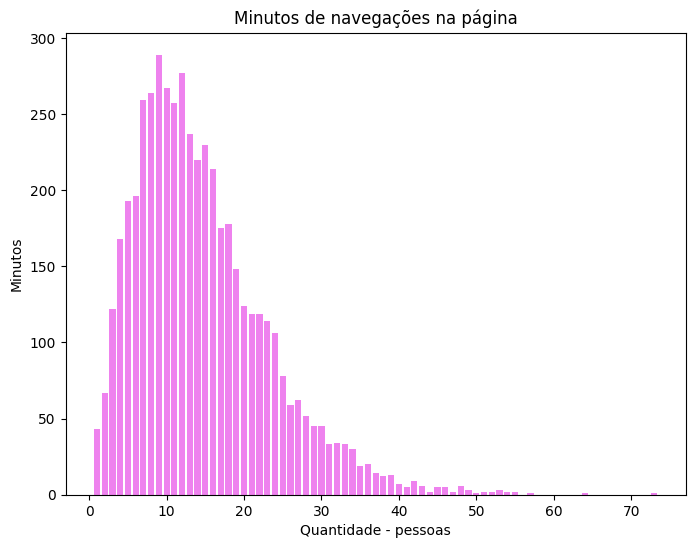

In [35]:
# Gráfico que exibir distribuição de minutos.

plt.figure(figsize=(8, 6))
rating_counts = df_ecommmer['Session_Duration_Minutes'].value_counts().sort_index()

plt.bar(rating_counts.index, rating_counts.values,color='Violet')
plt.title('Minutos de navegações na página')
plt.xlabel('Quantidade - pessoas')
plt.ylabel('Minutos')

plt.show()


Hipótese: **clientes recorrentes** já tem padrões identificados pela página, já tem familiaridade,
mas usuários novos tendem a precisa de mais tempo para entender o lead e encontrar o que desejam.

In [36]:
# Analisando quantidade de clientes em cada cidade  por gênero
df_ecommmer['Gender'].value_counts()

# Maior público: Gênero feminino

df_ecommmer.groupby('Gender')['City'].value_counts()  # A concentração dos clientes de gênero "feminino" e "masculino" possuem números próximos

Gender  City     
Female  Istanbul     626
        Ankara       364
        Izmir        315
        Bursa        264
        Adana        190
        Antalya      179
        Gaziantep    177
        Konya        159
        Kayseri      112
        Eskisehir    106
Male    Istanbul     634
        Ankara       362
        Izmir        276
        Bursa        224
        Antalya      190
        Adana        183
        Gaziantep    166
        Konya        155
        Kayseri      142
        Eskisehir    103
Other   Istanbul      24
        Ankara         9
        Izmir          9
        Bursa          8
        Gaziantep      6
        Adana          5
        Antalya        5
        Kayseri        3
        Konya          3
        Eskisehir      1
Name: count, dtype: int64

O gráfico abaixo exibir a quantidade de clientes por **sexo** em cada **cidade**

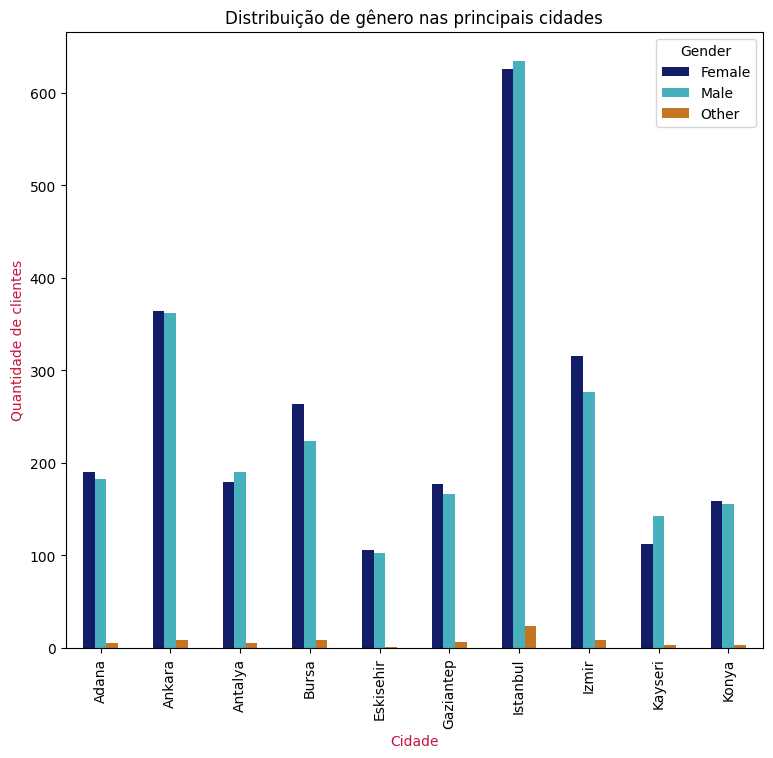

In [37]:
top_cidades = df_ecommmer['City'].value_counts().head(10).index

df_top = df_ecommmer[df_ecommmer['City'].isin(top_cidades)]

pivot = df_top.groupby(['City','Gender']).size().unstack()

pivot.plot(
    kind='bar',
    figsize=(9,8),
    color=['#131c66','#48afbd','#c47423']
)


plt.title('Distribuição de gênero nas principais cidades')
plt.xlabel('Cidade',color='#c4143d')
plt.ylabel('Quantidade de clientes',color='#c4143d')



plt.show()

É possível nota cada cidade e sua influência de clientes por gênero
Em destaque está a cidade **Istanbul,Adana, Ankara**.
Clientes do sexo **feminino** ocupam maior concentração em diversas cidades.

In [38]:
# Verificando o número de clientes que utilizam cada dispositivo
df_ecommmer['Device_Type'].value_counts()  # Grande parte dos clientes usam dispositivos Mobile

,count
Device_Type,
Mobile,2795
Desktop,1711
Tablet,494


Viualização com gráfico: Valor total por dipositivo.

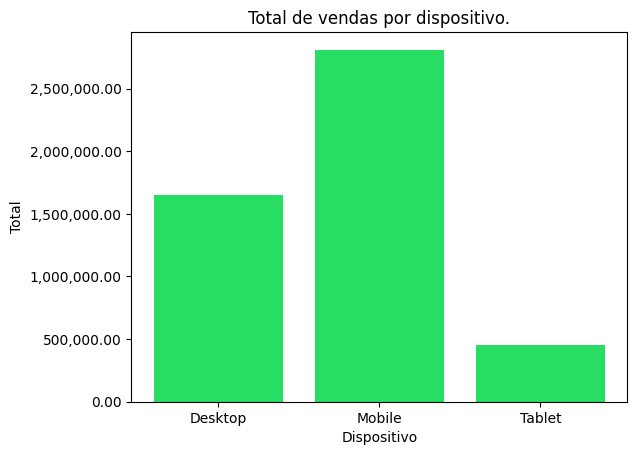

In [39]:
filtro_dispositivo=df_ecommmer.groupby("Device_Type")["Total_Amount"].sum()
filtro_dispositivo



from matplotlib.ticker import StrMethodFormatter

plt.bar(filtro_dispositivo.index, filtro_dispositivo.values, color='#28de62')
plt.title('Total de vendas por dispositivo.')
plt.xlabel('Dispositivo')
plt.ylabel('Total')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.show()




O dispositivo **computador** se destacar com maior número de compras efetuadas através do aparelho.


O gráfico de pizza a seguir permite entender a influência e o quanto cada dispositivo está inserido no uso dos clientes.

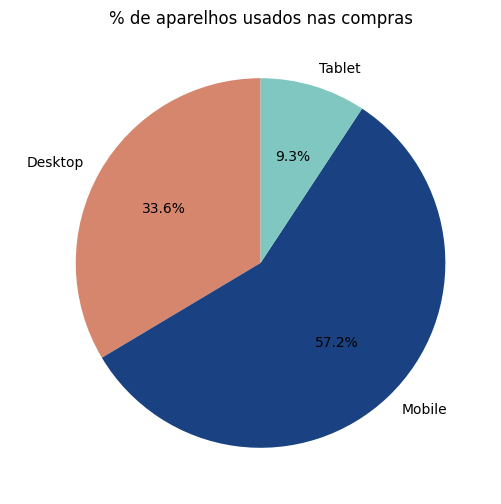

In [40]:

# # Tempo de sessão por dispositivos
# tempo_sesao_por_dispositivo=df_ecommmer.groupby('Device_Type')['Total_Amount'].sum()

filtro_dispositivo.plot.pie(y='sum',
    figsize=(6, 6),
    autopct='%1.1f%%', # Mostra a porcentagem com uma casa decimal
    startangle=90,     # Rotaciona o início do gráfico
    colors=['#d6866d','#1a4282','#7fc7c0'],
    legend=False
)

plt.title('% de aparelhos usados nas compras')
plt.ylabel(' ')

plt.show()

In [41]:
# Analisando formas de pagamento ultilizadas pelos clientes  recorrete/não recorrente
forma_pagamento=df_ecommmer.groupby('Payment_Method')['Is_Returning_Customer'].value_counts()
forma_pagamento

Payment_Method    Is_Returning_Customer
Bank Transfer     True                      300
                  False                     210
Cash on Delivery  True                      146
                  False                     102
Credit Card       True                     1187
                  False                     825
Debit Card        True                      777
                  False                     488
Digital Wallet    True                      580
                  False                     385
Name: count, dtype: int64

In [42]:
df_ecommmer.describe()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating,Year,Month
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2023-08-16 09:16:24.959999744,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800,2023.190600,5.731200
min,2023-01-01 00:00:00,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000,2023.000000,1.000000
25%,2023-04-30 00:00:00,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000,2023.000000,2.000000
50%,2023-08-17 00:00:00,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000,2023.000000,5.000000
75%,2023-12-06 00:00:00,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000,2023.000000,9.000000
max,2024-03-26 00:00:00,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000,2024.000000,12.000000
std,NaN,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542,0.392814,3.619885


O gráfico exibirá a quantidade de clientes que utilizam cada método de pagamento

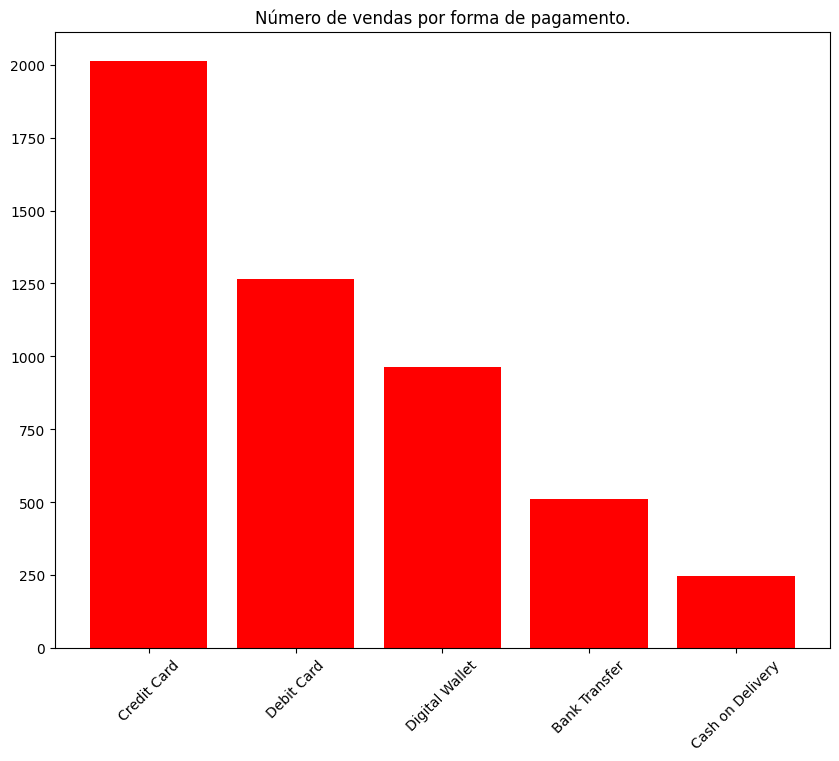

In [63]:
import matplotlib.pyplot as plt


forma_pagamento1 = df_ecommmer['Payment_Method'].value_counts()

plt.figure(figsize=(10,8))
plt.bar(forma_pagamento1.index.astype(str), forma_pagamento1.values,color='Red')
plt.title('Número de vendas por forma de pagamento.')
plt.xticks(rotation=45)
plt.show()

A forma de pagamento em **cartão de crédito** se destacar.
É possivel nota padrão nessa forma de pagamento.

O gráfico abaixo exibir quantidade de clientes recorrentes (True/False), que realizaram compras através dos métodos de pagamentos.

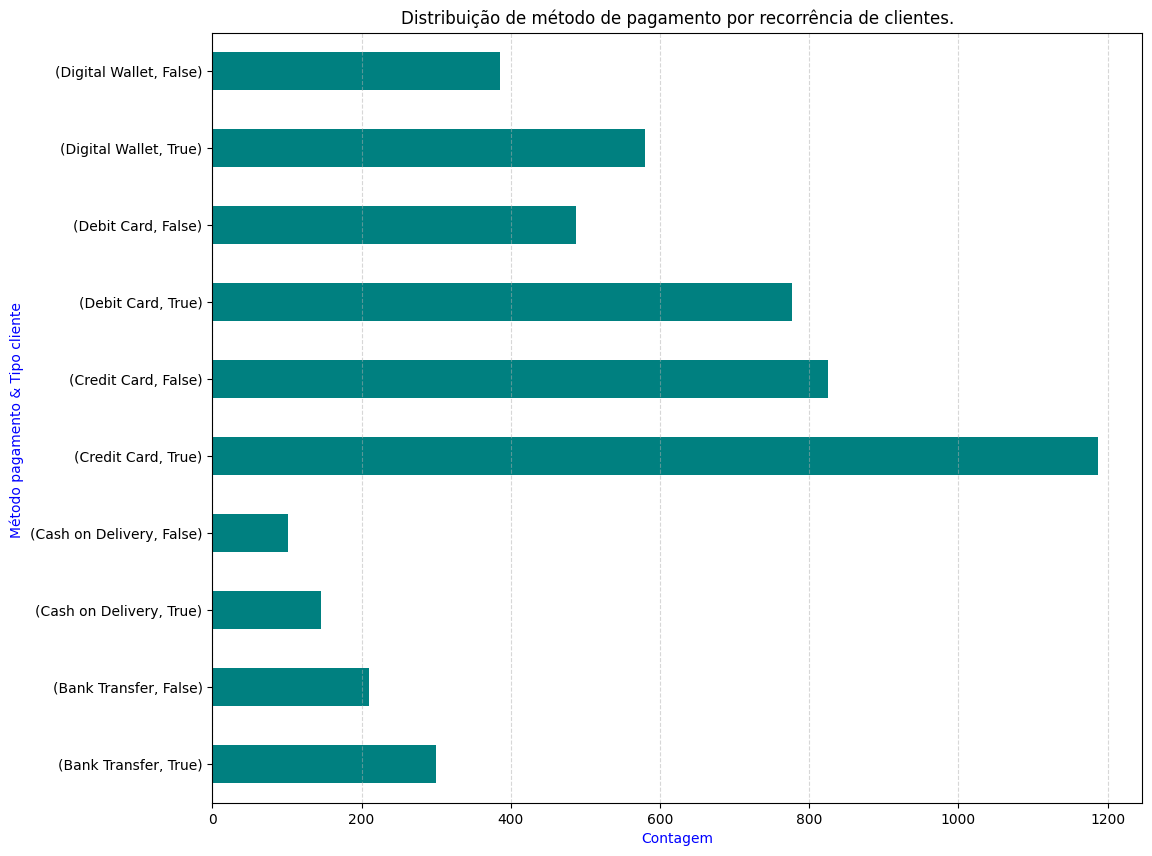

In [44]:
filtro_metodo_pagamento=df_ecommmer.groupby('Payment_Method')['Is_Returning_Customer'].value_counts()

plt.figure(figsize=(12,10))

filtro_metodo_pagamento.plot.barh(x='Payment_Method', y='Is_Returning_Customer', color='teal', legend=False)

plt.title('Distribuição de método de pagamento por recorrência de clientes.')
plt.xlabel('Contagem',color='Blue')
plt.ylabel('Método pagamento & Tipo cliente ',color='blue')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.savefig('Distribuição do método de pagamento por recorrência de clientes.png')

plt.show()


O **gráfico de coluna vertical** exibir números consideraveis tendo como enfase o método **cartão de crédito** (credit card) para **clientes recorrentes**.
É possivél observa que em todos os métodos de pagamento os clientes **recorrentes** ultrapassam a margem de clientes NÃO **recorrentes**

In [45]:
df_ecommmer

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,...,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Year_Month
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,...,Debit Card,Mobile,4,14,True,8,5,2023,1,2023-01
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,...,Credit Card,Mobile,11,3,True,3,3,2023,1,2023-01
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,...,Credit Card,Mobile,7,8,True,5,2,2023,1,2023-01
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,...,Credit Card,Mobile,8,10,False,1,4,2023,1,2023-01
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,...,Cash on Delivery,Desktop,21,10,True,7,4,2023,1,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,...,Bank Transfer,Mobile,17,10,False,9,1,2024,3,2024-03
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,...,Debit Card,Mobile,13,9,True,6,4,2024,3,2024-03
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,...,Digital Wallet,Mobile,38,10,True,5,4,2024,3,2024-03
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,...,Credit Card,Mobile,20,12,True,5,4,2024,3,2024-03


# Tratamento das colunas do tipo string & divisão das variáveis para o modelo

In [46]:
# Visualizando colunas categóricas
colunas_categoricas=df_ecommmer.select_dtypes(include='object').columns
colunas_categoricas



# As colunas de ID não seram modificadas, as demais podem sim serem ultiliza no modelo e serão transformadas.

Index(['Order_ID', 'Customer_ID', 'Gender', 'City', 'Product_Category',
       'Payment_Method', 'Device_Type'],
      dtype='object')

Para a transformação de colunas **catégoricas** será ultilizado a técnica **Binary Encoding**, porque se aplica melhor a quantidade de colunas a serem modificadas e possui uma abordagem binária.

In [47]:
import category_encoders as ce

# Separando colunas para uso
colunas_ML=[
    'Gender',
    'City',
    'Product_Category',
    'Payment_Method',
    'Device_Type'

]


# Criando o encoder binário
binary_encoder=ce.BinaryEncoder(
    cols=colunas_ML,
    drop_invariant=True
)



# Aplicando o encoder
df_encoded=binary_encoder.fit_transform(df_ecommmer)

In [48]:
# Tratando colunas booleanas
coluna_booleana=df_ecommmer.select_dtypes(include='bool').columns

# modificando coluna
df_ecommmer[coluna_booleana]=df_ecommmer[coluna_booleana].astype(int)

# visualizando
df_ecommmer['Is_Returning_Customer']  # False --> 0, True --> 1

,Is_Returning_Customer
0,1
1,1
2,1
3,0
4,1
...,...
4995,0
4996,1
4997,1
4998,1


In [49]:
# visualizando o resultado
df_encoded.info()

df_encoded


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  5000 non-null   object        
 1   Customer_ID               5000 non-null   object        
 2   Date                      5000 non-null   datetime64[ns]
 3   Age                       5000 non-null   int64         
 4   Gender_0                  5000 non-null   int64         
 5   Gender_1                  5000 non-null   int64         
 6   City_0                    5000 non-null   int64         
 7   City_1                    5000 non-null   int64         
 8   City_2                    5000 non-null   int64         
 9   City_3                    5000 non-null   int64         
 10  Product_Category_0        5000 non-null   int64         
 11  Product_Category_1        5000 non-null   int64         
 12  Product_Category_2  

,Order_ID,Customer_ID,Date,Age,Gender_0,Gender_1,City_0,City_1,City_2,City_3,...,Device_Type_0,Device_Type_1,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Year_Month
0,ORD_001337,CUST_01337,2023-01-01,27,0,1,0,0,0,1,...,0,1,4,14,True,8,5,2023,1,2023-01
1,ORD_004885,CUST_04885,2023-01-01,42,1,0,0,0,1,0,...,0,1,11,3,True,3,3,2023,1,2023-01
2,ORD_004507,CUST_04507,2023-01-01,43,0,1,0,0,1,1,...,0,1,7,8,True,5,2,2023,1,2023-01
3,ORD_000645,CUST_00645,2023-01-01,32,1,0,0,1,0,0,...,0,1,8,10,False,1,4,2023,1,2023-01
4,ORD_000690,CUST_00690,2023-01-01,40,0,1,0,1,0,0,...,1,0,21,10,True,7,4,2023,1,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,0,1,0,1,0,1,...,0,1,17,10,False,9,1,2024,3,2024-03
4996,ORD_001051,CUST_01051,2024-03-26,27,1,0,1,0,1,0,...,0,1,13,9,True,6,4,2024,3,2024-03
4997,ORD_003543,CUST_03543,2024-03-26,45,0,1,0,1,1,1,...,0,1,38,10,True,5,4,2024,3,2024-03
4998,ORD_004443,CUST_04443,2024-03-26,41,0,1,0,1,0,0,...,0,1,20,12,True,5,4,2024,3,2024-03


Normalização dos dados

In [50]:
from sklearn.preprocessing import MinMaxScaler

colunas_para_normalizar=[
      'Unit_Price',
       'Session_Duration_Minutes',
      'Pages_Viewed',
      'Delivery_Time_Days',
      'Customer_Rating',
      'Total_Amount',
      'Age'

]

scaler=MinMaxScaler()
df_encoded[colunas_para_normalizar]=scaler.fit_transform(df_encoded[colunas_para_normalizar])




In [51]:
df_encoded

,Order_ID,Customer_ID,Date,Age,Gender_0,Gender_1,City_0,City_1,City_2,City_3,...,Device_Type_0,Device_Type_1,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Year_Month
0,ORD_001337,CUST_01337,2023-01-01,0.157895,0,1,0,0,0,1,...,0,1,0.041667,0.565217,True,0.291667,1.00,2023,1,2023-01
1,ORD_004885,CUST_04885,2023-01-01,0.421053,1,0,0,0,1,0,...,0,1,0.138889,0.086957,True,0.083333,0.50,2023,1,2023-01
2,ORD_004507,CUST_04507,2023-01-01,0.438596,0,1,0,0,1,1,...,0,1,0.083333,0.304348,True,0.166667,0.25,2023,1,2023-01
3,ORD_000645,CUST_00645,2023-01-01,0.245614,1,0,0,1,0,0,...,0,1,0.097222,0.391304,False,0.000000,0.75,2023,1,2023-01
4,ORD_000690,CUST_00690,2023-01-01,0.385965,0,1,0,1,0,0,...,1,0,0.277778,0.391304,True,0.250000,0.75,2023,1,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,0.000000,0,1,0,1,0,1,...,0,1,0.222222,0.391304,False,0.333333,0.00,2024,3,2024-03
4996,ORD_001051,CUST_01051,2024-03-26,0.157895,1,0,1,0,1,0,...,0,1,0.166667,0.347826,True,0.208333,0.75,2024,3,2024-03
4997,ORD_003543,CUST_03543,2024-03-26,0.473684,0,1,0,1,1,1,...,0,1,0.513889,0.391304,True,0.166667,0.75,2024,3,2024-03
4998,ORD_004443,CUST_04443,2024-03-26,0.403509,0,1,0,1,0,0,...,0,1,0.263889,0.478261,True,0.166667,0.75,2024,3,2024-03


O método a seguir tem como intuito definir a quantidade de **grupos** que o modelo deve encontrar.

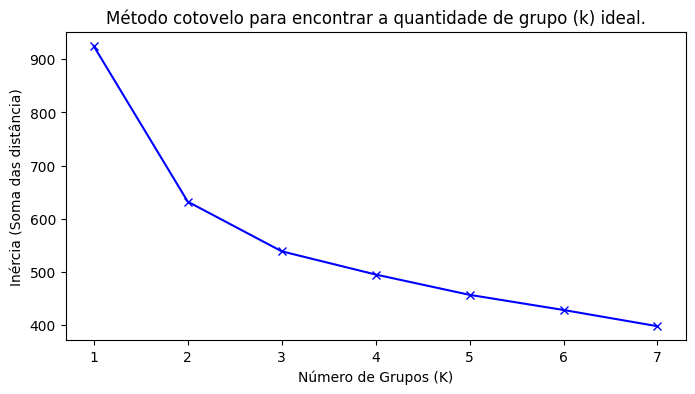

In [61]:
inercia=[]
k_range=range(1,8)

for k in k_range:
     kmeans_teste=KMeans(n_clusters=k,
                      n_init=10,
                      random_state=42)

     kmeans_teste.fit(df_encoded[colunas_para_normalizar])
     inercia.append(kmeans_teste.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, inercia, 'bx-')
plt.xlabel('Número de Grupos (K)')
plt.ylabel('Inércia (Soma das distância)')
plt.title('Método cotovelo para encontrar a quantidade de grupo (k) ideal.')
plt.show()

Por meio do método é possível identificar que o número ideal de **clusters é 2**.
 Onde a inércia (soma das distâncias internas) apresenta sua maior redução estrutural. Conseguindo uma separação clara entre clientes de alto engajamento e clientes de baixo engajamento

Aplicação do modelo ultilizando K-Means

In [53]:
all_columns = df_encoded.columns.tolist()

# Colunas que não seram features no modelo
columns_to_exclude = [
    'Order_ID',
    'Customer_ID',
    'Date',
    'Month',
    'Year_Month',
    'Is_Returning_Customer' ]


X = df_encoded.drop(columns=columns_to_exclude, errors='ignore')

kmeans = KMeans(n_clusters=2, random_state=42, n_init=30)
# Treinamento do modelo
df_encoded['Cluster'] = kmeans.fit_predict(X[colunas_para_normalizar])

# Visualizando a divisão dos grupos
print(df_encoded['Cluster'].value_counts())


# Mapeamento para os resultado sim/não
df_encoded['Vai_comprar_novamente']=df_encoded['Cluster'].map({0: 'sim',1:'Não'})


# Visualizando o resultado
print(df_encoded[['Customer_Rating',
                 'Total_Amount',
                  'Vai_comprar_novamente']].head())

Cluster
0    3578
1    1422
Name: count, dtype: int64
   Customer_Rating  Total_Amount Vai_comprar_novamente
0             1.00      0.002108                   sim
1             0.50      0.010766                   Não
2             0.25      0.010578                   Não
3             0.75      0.025750                   sim
4             0.75      0.171247                   sim


In [54]:
# Verificando o perfil dos grupos de clientes
df_encoded.groupby('Cluster')[colunas_para_normalizar].mean()

,Unit_Price,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating,Total_Amount,Age
Cluster,,,,,,,
0,0.063656,0.189495,0.347267,0.228992,0.878074,0.044599,0.298981
1,0.061317,0.186064,0.346817,0.229167,0.342300,0.043537,0.298406


O gráfico ilustra os grupos de clientes identificados pelo K-means.

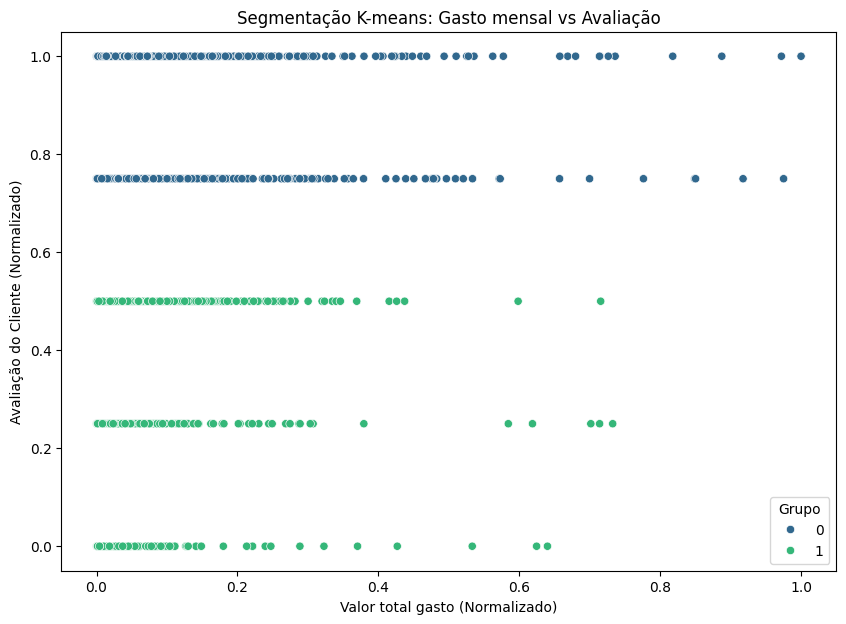

In [55]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.scatterplot(data=df_encoded,
                x='Total_Amount',
                y='Customer_Rating',
                hue='Cluster',
                palette='viridis')

plt.title('Segmentação K-means: Gasto mensal vs Avaliação')
plt.xlabel('Valor total gasto (Normalizado)')
plt.ylabel('Avaliação do Cliente (Normalizado)')
plt.legend(title='Grupo')

plt.savefig('Divisão dos grupos definidos pelo modelo.png')
plt.show()

 Nota-se que os grupos **0 e 1** concentram os clientes de maior valor: aqueles que combinam **maior gasto financeiro com as melhores avaliações**. Essa associação sugere que a satisfação é o principal motor de faturamento e o indicador chave para quem deve comprar novamente.

A seguir medindo o quanto eficiente é o modelo

In [56]:
# Cálculo da nota para o ML
score=silhouette_score(df_encoded[colunas_para_normalizar],
                       df_encoded['Cluster'])

print(f'Coeficiente de Silhueta:\n{score:.2f}')

Coeficiente de Silhueta:
0.32


O Coeficiente de Silhueta de **0.32** valida que o modelo encontrou agrupamentos distintos.

Isso significa que a separação entre os clientes que tendem a voltar e os que não tendem não é aleatória, mas sim baseada em padrões reais de consumo e satisfação

A seguir visualizamos a exibição do resultado encontrado pelo modelo


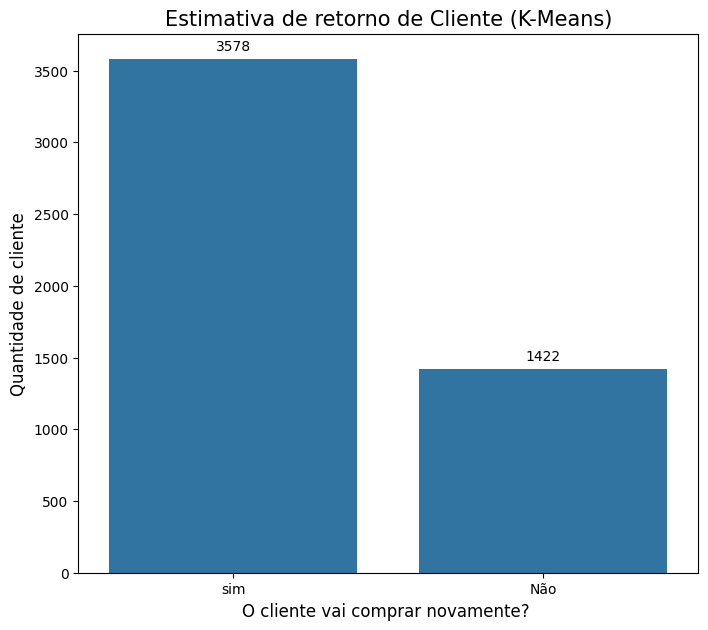

In [57]:
plt.figure(figsize=(8,7))
sns.countplot(x='Vai_comprar_novamente',data=df_encoded)


plt.title('Estimativa de retorno de Cliente (K-Means)',fontsize=15)
plt.xlabel('O cliente vai comprar novamente? ',fontsize=12)
plt.ylabel('Quantidade de cliente',fontsize=12)


ax=plt.gca()
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.savefig('Resultado_modelo.png')

plt.show()

# Conclusão do modelo
O modelo K-means segmentou a base em dois perfis distintos. O grupo "Sim" apresenta maior ticket médio e avaliações superiores, enquanto o grupo "Não" é caracterizado por menor engajamento financeiro.